<a href="https://colab.research.google.com/github/prishi29/Machine_Learning/blob/main/LogosticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOGISTIC REGRESSION

In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Reading the dataset
ad = pd.read_csv("/content/advertising.csv")

In [ ]:
#Printing the top columns
ad.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
#Checking the shape of the data
ad.shape

(1000, 10)

In [ ]:
#Changing the name of Male Column to Gender
ad.rename(columns={'Male':'Gender'},inplace=True)

In [ ]:
#Checking the statistical characteristics of the continuous variables
ad.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [ ]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Gender                    1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
#Checking null values
ad.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

There are no null values

In [ ]:
ad['Clicked on Ad'].replace({0: 1, 1: 0},inplace=True)
ad.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,1
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,1


As per the description of the columns of the dataset:
- 0 -> Clicked on ad
- 1 -> Not clicked on ad

This can be misinteerpreted during correlation matrix and the negative and positive correlation may get interchanged. Hence, we change 0 to 1 and 1 to 0 for better analysis.



In [ ]:
print("The total number of unique cities are: ",ad['City'].nunique())
print("The total number of unique countries are: ",ad['Country'].nunique())

The total number of unique cities are:  969
The total number of unique countries are:  237


In [ ]:
ad['Timestamp'] = pd.to_datetime(ad['Timestamp'])

In [ ]:
ad['Month'] = ad['Timestamp'].dt.month
ad['Day'] = ad['Timestamp'].dt.day
ad['Hour'] = ad['Timestamp'].dt.hour
ad["Weekday"] = ad['Timestamp'].dt.dayofweek 
ad = ad.drop(['Timestamp'], axis=1)
ad.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Clicked on Ad,Month,Day,Hour,Weekday
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,1,3,27,0,6
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,1,4,4,1,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,1,3,13,20,6


In [ ]:
ad.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Gender                        int64
Country                      object
Clicked on Ad                 int64
Month                         int64
Day                           int64
Hour                          int64
Weekday                       int64
dtype: object

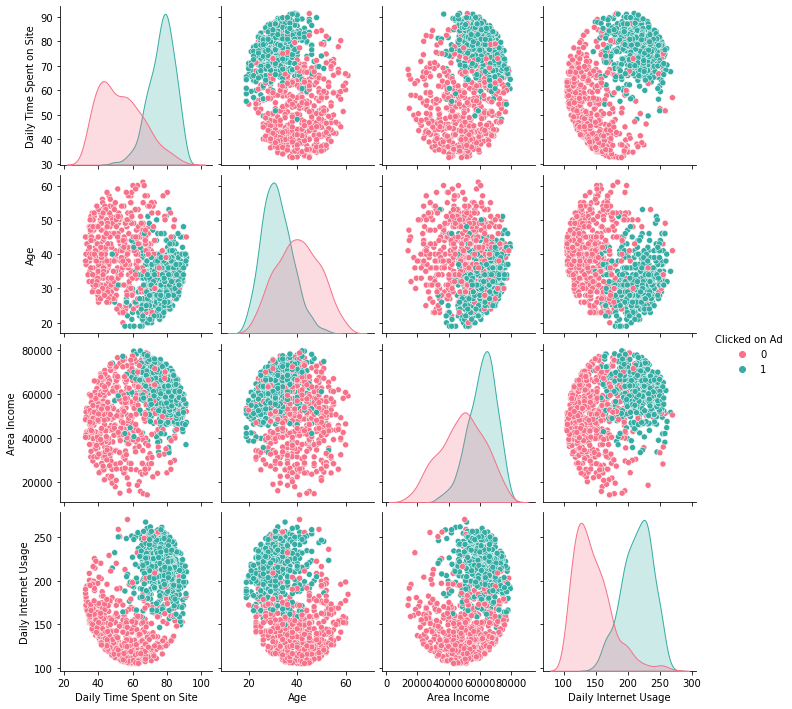

In [ ]:
sns.pairplot(ad, hue = 'Clicked on Ad', vars = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'],palette = 'husl')

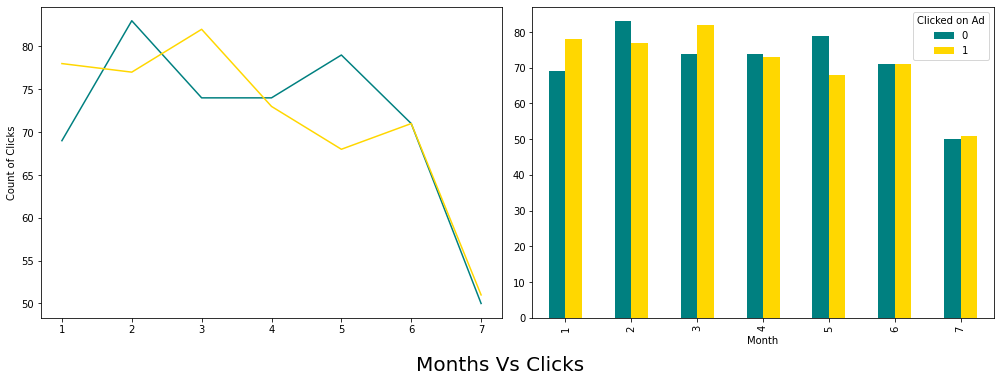

In [ ]:
f,ax=plt.subplots(1,2,figsize=(14,5))
ad['Month'][ad['Clicked on Ad']==0].value_counts().sort_index().plot(color="teal",ax=ax[0])
ad['Month'][ad['Clicked on Ad']==1].value_counts().sort_index().plot(color="gold",ax=ax[0])
ax[0].set_ylabel('Count of Clicks')
pd.crosstab(ad["Clicked on Ad"], ad["Month"]).T.plot(kind = 'bar',color=['teal','gold'],ax=ax[1])
plt.tight_layout()
plt.suptitle('Months Vs Clicks',y=0,size=20)
plt.show()

1. Information of only 7 months is available.
2. February has the highest clicked on ad count.
2. March has the highest not clicked on ad count.
3. July has the lowest ad clicked and not clicked count.

In [ ]:
#pd.pivot_table(ad, index = ['Weekday'], values = ['Clicked on Ad'],aggfunc= np.sum)

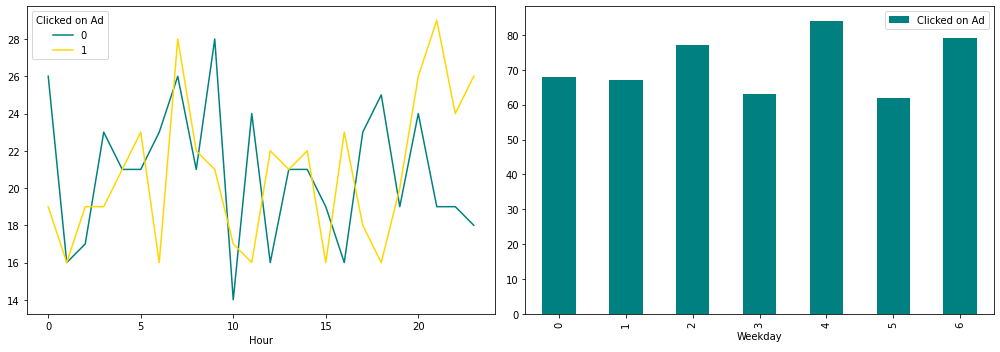

In [ ]:
f,ax=plt.subplots(1,2,figsize=(14,5))
pd.crosstab(ad["Clicked on Ad"],ad["Hour"]).T.plot(style = [], color=['teal','gold'],ax = ax[0])
pd.pivot_table(ad, index = ['Weekday'], values = ['Clicked on Ad'],aggfunc= np.sum).plot(kind = 'bar',color='teal', ax=ax[1])
plt.tight_layout()
plt.show()

1. At night 9:00 P.M. the number of clicks on ads were maximum.
2. At morning 10:00 A.M. the number of no clicks on ads were maximum.
3. The ad click count are highest on Wednesday.
4. The ad click count are lowest on Thursday.

In [ ]:
a=pd.crosstab(ad["Clicked on Ad"],ad["Gender"]).T
a

Clicked on Ad,0,1
Gender,,
0,269,250
1,231,250


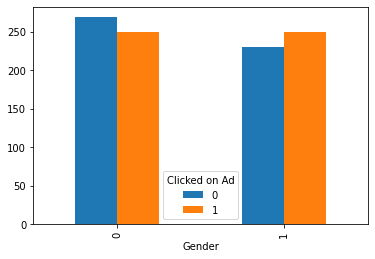

In [ ]:
a.plot(kind='bar')

1. Equal number of males and females clicked on ads.
2. The number of males who did not click on ads were more than the number of females who did not click on ads.

In [ ]:
# ad.groupby(['Month'])['Clicked on Ad'].sum() 

In [ ]:
# plt.figure(figsize=(8,7))
# ax1 = sns.kdeplot(ad["Age"][ad['Clicked on Ad'] == 1], color="darkturquoise", shade=True)
# sns.kdeplot(ad["Age"][ad['Clicked on Ad'] == 0], color="lightcoral", shade=True)
# plt.legend(['Clicked on ad', 'Did not click on ad'])
# plt.title('Density Plot of Age for clicked and not clicked on ad')
# ax.set(xlabel='Age')
# plt.xlim(-10,85)
# plt.show()

Higher proportion of young people clicked on ad

In [ ]:
country=pd.crosstab(ad['Country'], ad['Clicked on Ad']).sort_values(1,ascending = False)
country

Clicked on Ad,0,1
Country,,
Gabon,0,6
Croatia,0,6
Bolivia,0,6
Kyrgyz Republic,1,5
Singapore,1,5
...,...,...
Saint Kitts and Nevis,1,0
Sao Tome and Principe,2,0
Sierra Leone,2,0


In [ ]:
city=pd.crosstab(ad['City'], ad['Clicked on Ad']).sort_values( 1,ascending = False)
city

Clicked on Ad,0,1
City,,
West Steven,0,2
Wrightburgh,0,2
New Sheila,0,2
East Timothy,0,2
Pamelamouth,0,2
...,...,...
Mariahview,1,0
Markhaven,1,0
Masseyshire,1,0


In [ ]:
# a.plot(kind="bar", color =['Blue','Red'])

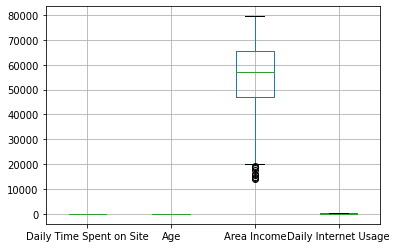

In [ ]:
box = ad.boxplot(column=['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'])

The range of Area Income is higher than the other variables indicating the requirement of scaling

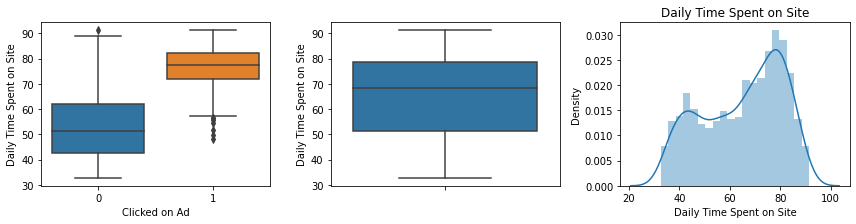

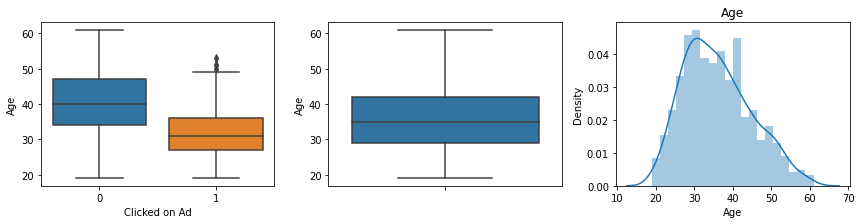

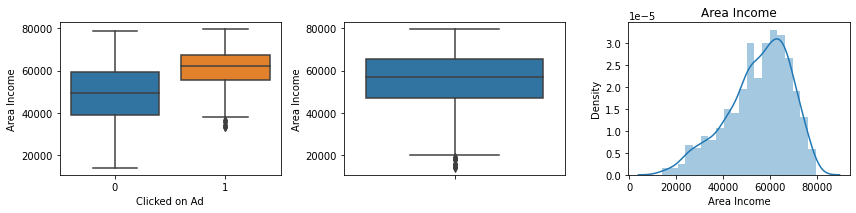

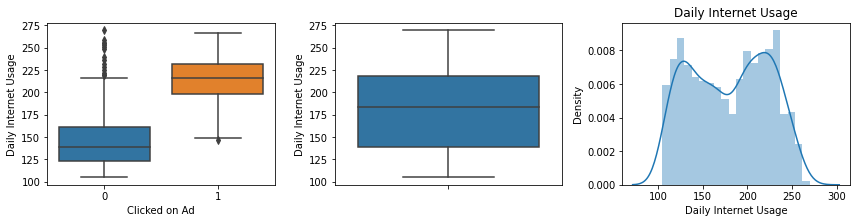

In [ ]:
plots = ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']
for i in plots:
    plt.figure(figsize = (12, 3))
    plt.subplot(1,3,1)
    sns.boxplot(data= ad, y=ad[i],x='Clicked on Ad')
    plt.subplot(1,3,2)
    sns.boxplot(data= ad, y=ad[i])
    plt.subplot(1,3,3)
    sns.distplot(ad[i],bins= 20)       
    plt.tight_layout()
    plt.title(i)    
    plt.show()

####Daily time spent on site :
1. On an average people who spent more daily time on website clicked more on ads than people who spent less daily time on website.
2. Daily Time spent on site has a bimodal distribution and is negatively skewed. Users who spent 60-90 hours daily on website were more than users who spent 30-60 hours daily on website.

####Age:

1. On an average people with lower age(around 25-35) clicked more on ads than people with higher age.
2. Age is positively skewed indicating that users between the age of 30-40 were more (It constituted about 50% of the data)

####Area Income:

1. On an average people with area income(about 60 K) clicked more on ads than people with area income(about 50K)
2. Area Income is negatively skewed indicating that users having the area income between 45K-62K were maximum.(It constituted about 50% of the data)

####Daily Internet Usage:

1. On an average people with higher daily internet usage (avg 225 mb) clicked more on ads than people with lower daily internet usage(avg 135mb)
2. Daily Internet Usage has a bimodal distribution. Number of users who used 100-190 mb of daily internet were almost equal to the number of users who used 190-300 mb of daily internet.

In [ ]:
ad['Clicked on Ad'].value_counts()

1    500
0    500
Name: Clicked on Ad, dtype: int64

In [ ]:
CTR = (500/1000)*100
print("The Click Through Rate(CTR) :",CTR,"%")

The Click Through Rate(CTR) : 50.0 %


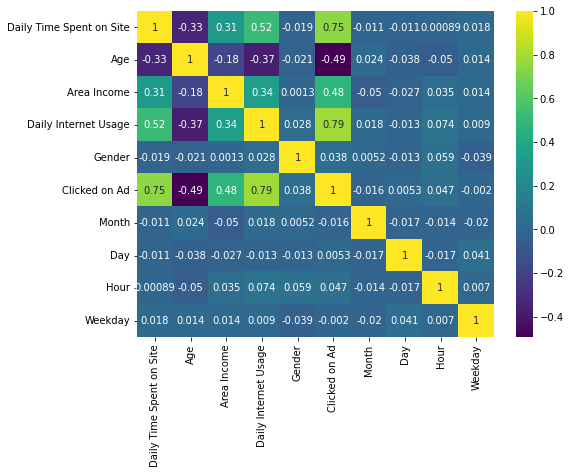

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(ad.corr(),annot=True,cmap="viridis");

In [ ]:
# sns.pairplot(ad,hue='Clicked on Ad',palette='bwr')

# Approach 1

In [ ]:
#Dividing the target variable and the predictors
x = ad.iloc[:,[0,3]].values
y = ad.iloc[:,8].values

In [ ]:
#Dividing into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
#Standadization to balance the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
#Training the model
from sklearn.linear_model import LogisticRegression
log_rg = LogisticRegression()
log_rg = log_rg.fit(x_train,y_train)
print("Successfully Trained")

Successfully Trained


In [ ]:
#Making Predictions
y_pred = log_rg.predict(x_test)

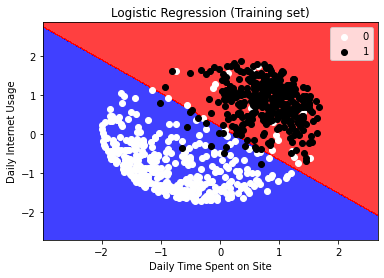

In [ ]:
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max()+1, step  =0.01),  
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 1].max()+1, step = 0.01))  
plt.contourf(x1, x2, log_rg.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue','red', )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('white', 'black'))(i), label = j) 
plt.title('Logistic Regression (Training set)')  
plt.xlabel('Daily Time Spent on Site')  
plt.ylabel('Daily Internet Usage')  
plt.legend()  
plt.show()

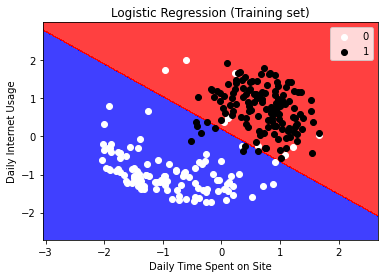

In [ ]:
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max()+1, step  =0.01),  
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 1].max()+1, step = 0.01))  
plt.contourf(x1, x2, log_rg.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue','red', )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('white', 'black'))(i), label = j) 
plt.title('Logistic Regression (Training set)')  
plt.xlabel('Daily Time Spent on Site')  
plt.ylabel('Daily Internet Usage')  
plt.legend()  
plt.show()

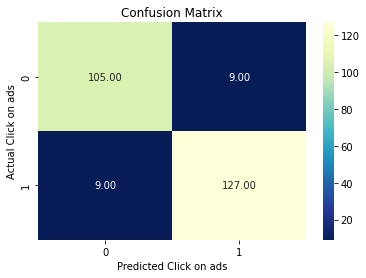

In [ ]:
#Plotting the confusion matrix to evaluate the accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='YlGnBu_r',fmt='.2f')
plt.title("Confusion Matrix")
plt.ylabel('Actual Click on ads')
plt.xlabel('Predicted Click on ads')
plt.show()

In [ ]:
#Checking the accuracy and misclassification percentage
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)
acc=np.round(acc*100,2)
print("Accuracy is :",acc,"%")
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
error = (FP + FN) / (TP + TN + FP + FN)
print("The misclassification percentage is:", np.round(error*100,2),"%")

Accuracy is : 92.8 %
The misclassification percentage is: 7.2 %


# Approach 2

In [ ]:
#Dividing the target variable and the predictors
x1 = ad.iloc[:,[0,1,2,3]].values
y1 = ad.iloc[:,[8]].values

In [ ]:
#Dividing into training and testing data
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1,test_size=0.25,random_state=0)

In [ ]:
#Standadization to balance the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_trains1 = sc.fit_transform(x_train1)
x_tests1 = sc.fit_transform(x_test1)

In [ ]:
#Training the model
from sklearn.linear_model import LogisticRegression
log_rg1 = LogisticRegression()
log_rg1 = log_rg1.fit(x_trains1,y_train1)
print("Successfully Trained")

Successfully Trained


In [ ]:
#Making Predictions
y_pred1 = log_rg1.predict(x_tests1)

In [ ]:
# b0 = log_rg.intercept_[0]
# b1, b2 ,b3,b4= log_rg.coef_.T

In [ ]:
# c=-b0/b4
# m=-b3/b4

In [ ]:
# Xd = np.array([x_train.T[2].min(), x_train.T[2].max()])
# Yd = m*Xd + c
# plt.ylim(100, 275)
# plt.plot(Xd,Yd, 'k-', label='Decision boundary')

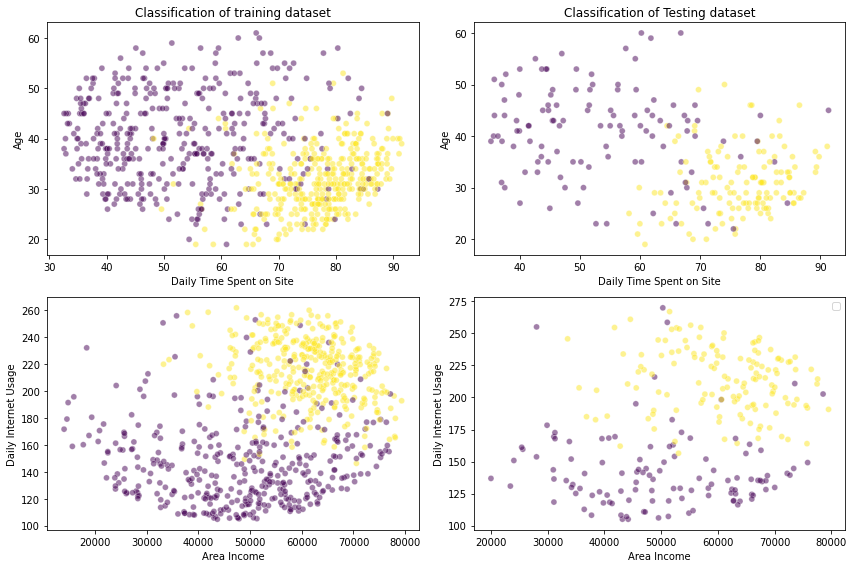

In [ ]:
fig1 ,axes = plt.subplots(2,2,figsize=(12,8))
s1=sns.scatterplot(x_train1[:,0], x_train1[:, 1], c=y_train1, alpha=0.5,ax=axes[0][0])
s2=sns.scatterplot(x_test1[:,0], x_test1[:, 1], c=y_test1, alpha=0.5,ax=axes[0][1])
s3=sns.scatterplot(x_train1[:,2], x_train1[:, 3], c=y_train1, alpha=0.5,ax=axes[1][0])
s4=sns.scatterplot(x_test1[:,2], x_test1[:, 3], c=y_test1, alpha=0.5,ax=axes[1][1])
axes[0][0].set_title('Classification of training dataset')
axes[0][1].set_title('Classification of Testing dataset')
axes[0][0].set_xlabel('Daily Time Spent on Site')
axes[0][1].set_xlabel('Daily Time Spent on Site')
axes[0][0].set_ylabel('Age')
axes[0][1].set_ylabel('Age')
axes[1][0].set_xlabel('Area Income')
axes[1][1].set_xlabel('Area Income')
axes[1][0].set_ylabel('Daily Internet Usage')
axes[1][1].set_ylabel('Daily Internet Usage')
plt.legend()
plt.tight_layout()

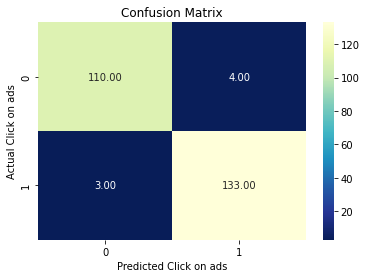

In [ ]:
#Plotting the confusion matrix to evaluate the accuracy
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test1,y_pred1)
sns.heatmap(cm1,annot=True,cmap='YlGnBu_r',fmt='.2f')
plt.title("Confusion Matrix")
plt.ylabel('Actual Click on ads')
plt.xlabel('Predicted Click on ads')
plt.show()

In [ ]:
#Checking the accuracy and misclassification percentage
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test1,y_pred1)
acc1=np.round(acc1*100,2)
print("Accuracy is :",acc1,"%")
TP = cm1[0,0]
TN = cm1[1,1]
FP = cm1[0,1]
FN = cm1[1,0]
error = (FP + FN) / (TP + TN + FP + FN)
print("The misclassification percentage is:", np.round(error*100,2),"%")

Accuracy is : 97.2 %
The misclassification percentage is: 2.8 %


#Approach 3

In [ ]:
train_df, test_df = train_test_split(ad, test_size = 0.25, random_state = 0)

In [ ]:
input_labels = ['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']
output_label = 'Clicked on Ad'

xx_train1 = train_df[input_labels]

yy_train1 = train_df[output_label]

In [ ]:
from sklearn.linear_model import LogisticRegression
log_rg2 = LogisticRegression()
log_rg2 = log_rg2.fit(xx_train1,yy_train1)
print("Successfully Trained")

Successfully Trained


In [ ]:
xx_test = test_df[input_labels]
yy_test = test_df[output_label].values.squeeze()
yy_pred = log_rg2.predict(xx_test)
yy_prob = log_rg2.predict_proba(xx_test)

<Figure size 864x216 with 0 Axes>

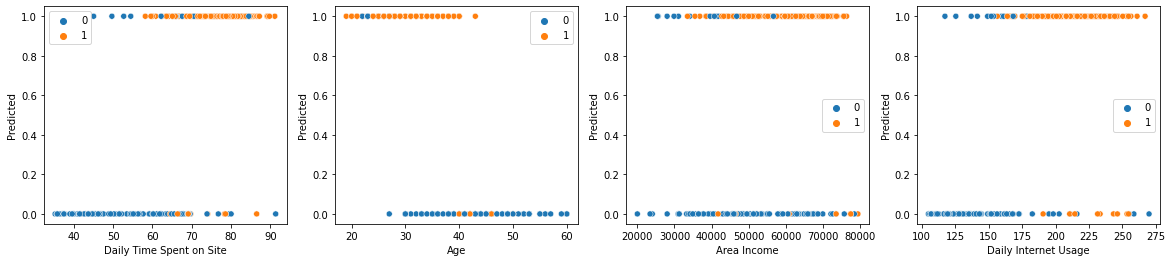

In [ ]:
input_labels = ['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']
num = [0,1,2,3]
plt.figure(figsize = (12, 3))
fig1 ,axes = plt.subplots(1,4,figsize=(20,4))
for i,input_label in zip(num, input_labels):
  yy_pred = yy_pred.squeeze()
  x_test_view = xx_test[input_labels[i]].values.squeeze()
  s1=sns.scatterplot(x_test_view, yy_pred, hue = yy_test, ax=axes[i])
  axes[i].set_ylabel('Predicted')
  axes[i].set_xlabel(input_label)
  plt.legend()

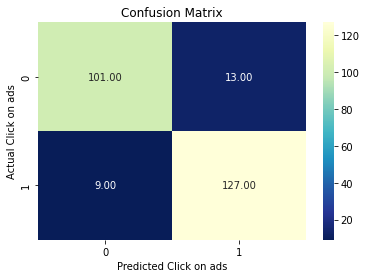

In [ ]:
#Plotting the confusion matrix to evaluate the accuracy
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(yy_test,yy_pred)
sns.heatmap(cm2,annot=True,cmap='YlGnBu_r',fmt='.2f')
plt.title("Confusion Matrix")
plt.ylabel('Actual Click on ads')
plt.xlabel('Predicted Click on ads')
plt.show()

In [ ]:
#Checking the accuracy
from sklearn.metrics import accuracy_score
acc2 = accuracy_score(yy_test,yy_pred)
acc2=np.round(acc2*100,2)
print("Accuracy is :",acc2,"%")
TP = cm2[0,0]
TN = cm2[1,1]
FP = cm2[0,1]
FN = cm2[1,0]
error = (FP + FN) / (TP + TN + FP + FN)
print("The misclassification percentage is:", np.round(error*100,2),"%")

Accuracy is : 91.2 %
The misclassification percentage is: 8.8 %


In [ ]:
Accuracy = {"Approaches":['With 2 Variables','With all Variables and Standardisation','With all variables and no Standardisation'],
            "Accuracy":[acc,acc1,acc2]}
Accuracy=pd.DataFrame(Accuracy)     
Accuracy

,Approaches,Accuracy
0,With 2 Variables,92.8
1,With all Variables and Standardisation,97.2
2,With all variables and no Standardisation,91.2
